**OVERVIEW**

The goal of this practical assignment is to understand what factors make a car more or less expensive and provide recommendations to my client who is a used car dealership as to what consumers value in a used car. Another important learning goal of this assigment is to study and use the CRISP-DM Framework.

# What drives the price of a car?

![](images/kurt.jpeg)

### CRISP-DM Framework

<center>
    <img src = ../images/crisp.png width = 20%/>
</center>

The Cross Industry Standard Process for Data Mining (CRISP-DM) is a process model that serves as the base for a data science process. It has six sequential phases:

* Business understanding – What does the business need?*
* Data understanding – What data do we have / need? Is it clean?
* Data preparation – How do we organize the data for modeling?
* Modeling – What modeling techniques should we apply?
* Evaluation – Which model best meets the business objectives?
* Deployment – How do stakeholders access the results?



 I have organized the practicle assignment as per the CRISP-DM Framework phases as below:

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 


1. Determine Business Objectives
    * Background: The  dataset [vehicles](../dataset/vehicles.csv) contains information on 426K cars.

    * Business Objectives: The goal is to understand what factors make a car more or less expensive and what consumers value in a used car. 

    * Business Success Criteria: Provide my customer with used car dealer recommendations on what consumers value in a used car.


2. Assess the Situation
    * Inventory of Resources: Assignment files "practical_application_II_starter" containing starter Jupiter notebook, dataset [vehicles](../dataset/vehicles.csv), readings starter documents to understand CRISP-DM Framework, discussion with course classmates, course material upto module 11.
provide
    * Requirements, Assumptions, and Constraints: Provide a recomendation report to my client, a used car dealership. The assumption is that as the dataset is from the public database Kaggle, it's acceptable to use it in a practical assignment. The original vehicle dataset contained 3 million cars; however, the dataset used in this practical assignment consists of 426K records to ensure processing speed.

    * Risks and Contingencies terminology: The success will depend on my understanding of topics covered up to module 11, the data processing is done on the dataset, and the modal/modals I selected as a part of my solution.

    * Costs and Benefits: The derived modal will help my client, a user car dealership, to adjust the price of used cars, understand what consumers value in a used car, and accordingly adjust the ads and promotion strategies to drive up the sales of used cars.

3. Determine Data Mining Goals
    * Data Mining Goals： Predict the price range that a seller is willing to sell and a buyer willing to buy, and the sale price for the car.

    * Data Mining Success Criteria： MSE or error rate when using a trained model to predict the price of sale to the untrained dataset.
4. Produce Project Plan
    * Project Plan： The CRISP framework is used to understand the business objective and data, prepare the data for modeling, evaluate the result, and present the finding in a report
    * Initial Assessment of Tools and Techniques： Jupiter Notebook is used as a computational documents tool for this assignment. The programming language used is Python, and the libraries used are: Pandas, Plotly, Seaborn, Matplotlib,  Numpy , Sklearn,statsmodels

### Data Understanding

After considering the business understanding, I explored dataset to understand the data columns and data contained in each column and identify any quality issues. 
Data Understanding

##### Collect Initial Data
Initial data collection report:The vehicles.csv dataframe contains 426880 records and features 18 features. 

##### Describe Data
Data Description report: 
* There are two int64 columns,two  float64 columns, and 14 object columns. 
* The vehicles.csv dataset contains following columns:

|columns|
|-------|
|id|
|region|
|price|
|year|
|manufacturer|
|model|
|condition|
|cylinders|
|fuel|
|odometer|
|title_status|
|transmission|
|VIN|
|drive|
|size|
|type|
|paint_color|
|state|

##### Explore Data

Data Exploration report: 
* Id, price, year and odometer are the numeric columns. Id and price don't have null values

* state, region columns don't have nulls

* I found following categorical columns that can be usefull for my analysis:

|column 	 	|values|
|---------------|-------|
|size      |NaN,'full-size','mid-size','compact','sub-compact'|
|drive      |NaN,'rwd','4wd','fwd'|
|type 	 	|NaN,'pickup','truck','other','coupe','SUV','hatchback','mini-van','sedan','offroad','bus','van', 'convertible','wagon'|
|paint_color 	 	|NaN,'white','blue','red','black', 'silver','grey','brown','yellow','orange','green','custom','purple'|
|title_status 	 	|NaN,'clean','rebuilt','lien','salvage','missing','parts only'|
|transmission 	 	|NaN,'other','automatic','manual'|
|fuel 	 	|NaN,'gas', 'other', 'diesel', 'hybrid', 'electric'|
|cylinders 	 	|NaN,'8 cylinders','6 cylinders','4 cylinders','5 cylinders','other','3 cylinders','10 cylinders','12 cylinders'|
|condition 	 	|NaN, 'good', 'excellent', 'fair', 'like new', 'new', 'salvage'|
|state 	 	|list of US 51 states|

##### Verify Data Quality

Data Quality report: 
* Dropna with how=any reduces the record count to 34868 hence its not suitable to drop nulls on entire dataset. 
* object columns were of the String datatype
* The following categorical columns has the most null values.

|column 	 	|null count|
|---------------|-------|
|condition      | 174104|
|cylinders      |177678 |
|VIN            |161042 |
|drive          |130567 |
|size           |306361 |
|paint_color    |130203 |
* price being the non null and the main column that will be used to perfrom data analysis 
* Odometer and year are important numeric column, but their non null count is 4400 and 1205 respectively which is high.

In [1]:
# Referenced Python libraries
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import statsmodels.graphics.tsaplots as tsplots
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_blobs
from sklearn.linear_model import LinearRegression, HuberRegressor, Lasso, Ridge
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import set_config
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Collect Initial Data
data = pd.read_csv('../dataset/vehicles.csv')
data.shape


(426880, 18)

In [3]:
# Describe data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [4]:
# Describe data

data.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

In [5]:
# Explore data

data.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [6]:
# Explore & Verify data
data.tail()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


In [7]:
# Explore & Verify data
#Find null value count for each column
data.isnull().sum()
#

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [8]:
# Explore data
#NaN values in every row
data.isnull().sum(axis = 1)

0         14
1         14
2         14
3         14
4         14
          ..
426875     2
426876     2
426877     3
426878     1
426879     3
Length: 426880, dtype: int64

In [9]:
# Describe data
data.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [10]:
# Describe data
data.describe(include = ['object'])

,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,VIN,drive,size,type,paint_color,state
count,426880,409234,421603,252776,249202,423867,418638,424324,265838,296313,120519,334022,296677,426880
unique,404,42,29649,6,8,5,6,3,118246,3,4,13,12,51
top,columbus,ford,f-150,good,6 cylinders,gas,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,ca
freq,3608,70985,8009,121456,94169,356209,405117,336524,261,131904,63465,87056,79285,50614


Data Visulization

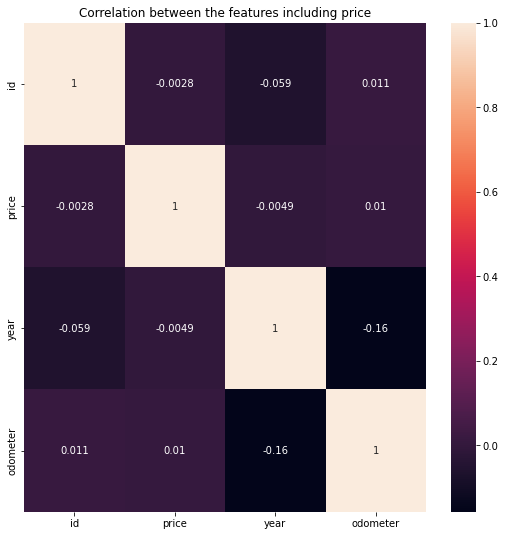

In [11]:
#Describe data and visualize it
data.corr()
plt.figure(figsize=(9,9))
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation between the features including price')
plt.show()

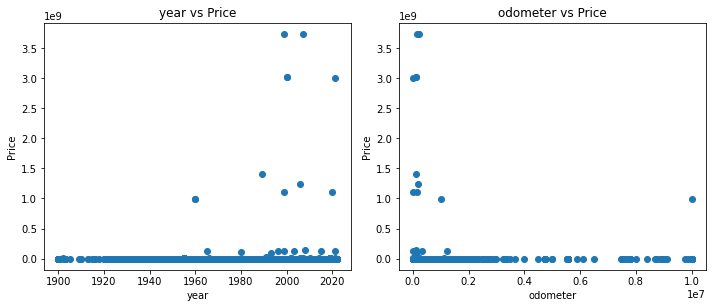

In [12]:
#Visualize numeric data
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(data[x],data['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('year', 1)
scatter('odometer', 2)


plt.tight_layout()

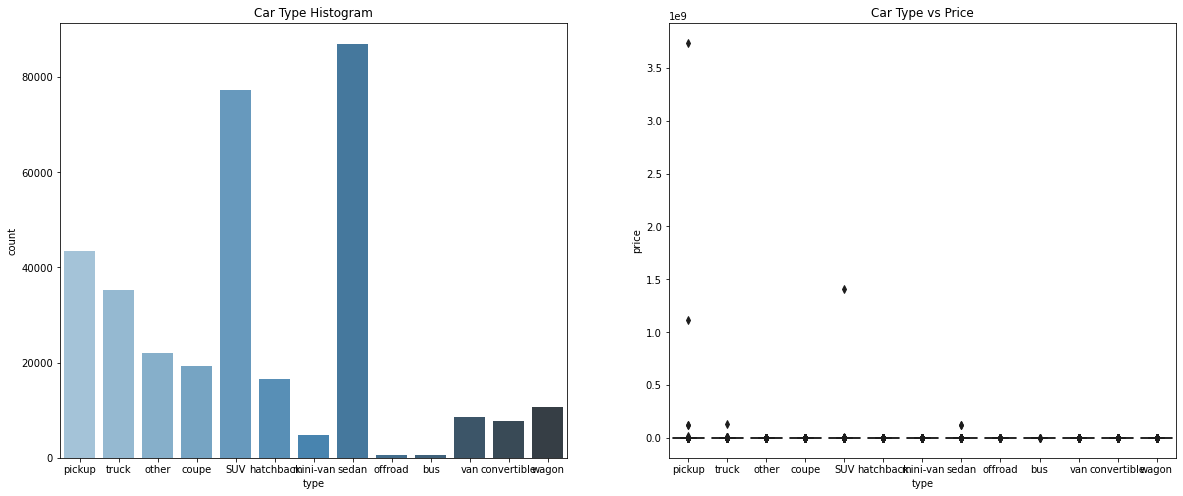

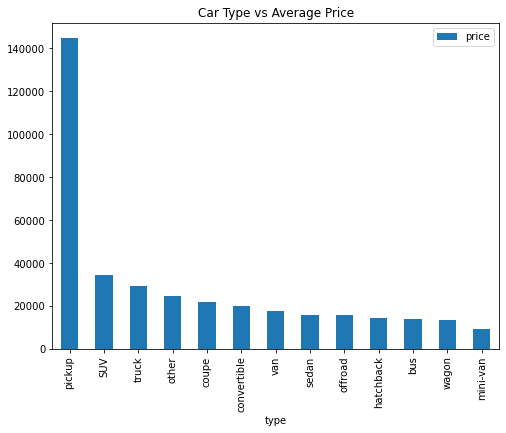

In [13]:
#Describe data and visualize it

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Type Histogram')
sns.countplot(data['type'], palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Car Type vs Price')
sns.boxplot(x=data['type'], y=data['price'], palette=("PuBuGn"))

df = pd.DataFrame(data.groupby(['type'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Car Type vs Average Price')
plt.show()

Inference:
* Sendan type car are the most sold used cars but fetch lower avg price
* SUV is second most sold car fetches medium average price
* Pickup car fetches highest average price

<Figure size 3600x1800 with 0 Axes>

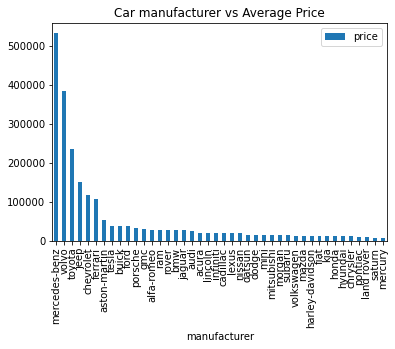

In [14]:
#Describe data and visualize it

plt.figure(figsize=(50, 25))

df = pd.DataFrame(data.groupby(['manufacturer'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car manufacturer vs Average Price')
plt.show()

# The below model plot take a lot of time due to font type issue tried to fix it by explicitly setting it but didn't work
#axis_font = {'fontname':'Arial', 'size':'14'}
#df = pd.DataFrame(data.groupby(['model'])['price'].mean().sort_values(ascending = False))
#df.plot.bar()
#plt.title('Car model  vs Average Price')
#plt.xlabel("x axis", **axis_font)
#plt.ylabel("y axis", **axis_font)
#plt.show()



Inference:
* Used Mercededes Benz followed by Volvo fetches the higest price
* I couldn't plot model column as it take a lot of time due to font type issue. I tried to fix it by explicitly setting it but didn't work

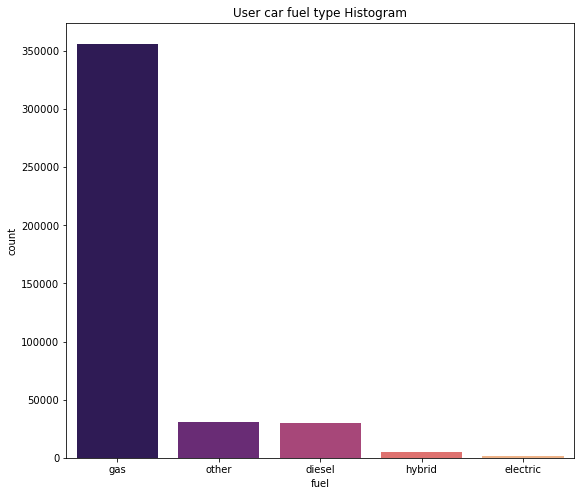

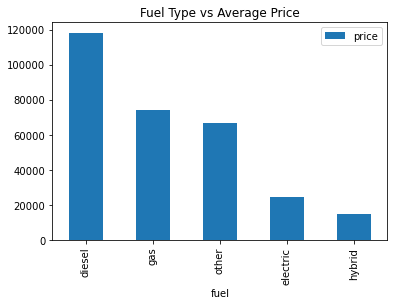

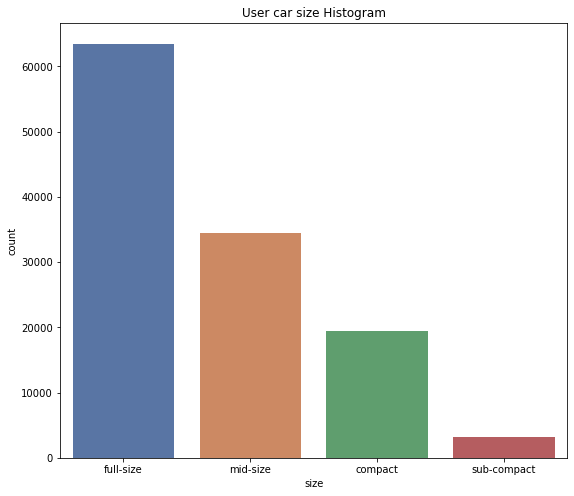

<Figure size 1440x576 with 0 Axes>

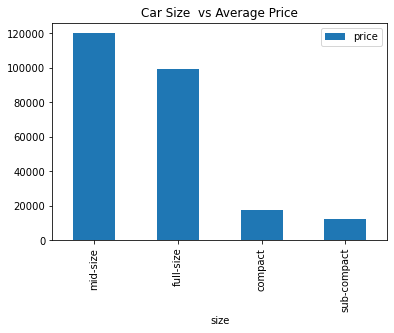

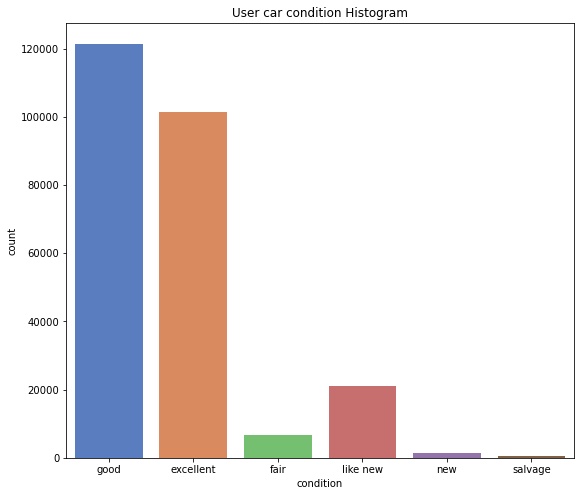

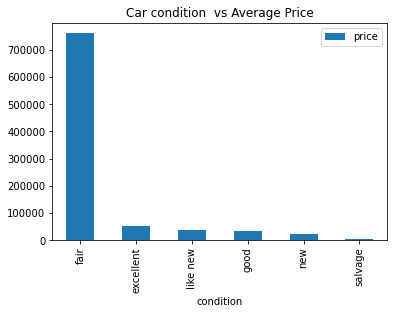

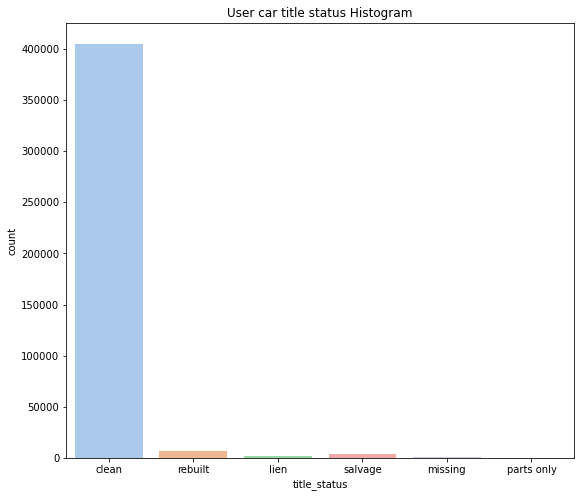

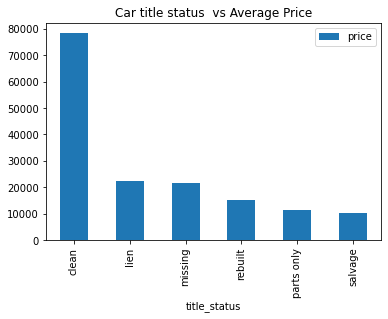

In [15]:

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('User car fuel type Histogram')
sns.countplot(data['fuel'],palette=("magma"))
df = pd.DataFrame(data.groupby(['fuel'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('User car size Histogram')
sns.countplot(data['size'], palette=("deep"))

plt.figure(figsize=(20,8))
df = pd.DataFrame(data.groupby(['size'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Size  vs Average Price')
plt.show()

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('User car condition Histogram')
sns.countplot(data['condition'], palette=("muted"))

df = pd.DataFrame(data.groupby(['condition'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car condition  vs Average Price')
plt.show()
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('User car title status Histogram')
sns.countplot(data['title_status'], palette=("pastel"))

df = pd.DataFrame(data.groupby(['title_status'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car title status  vs Average Price')
plt.show()

Inference:
* Diesel vehical fetches higher average price than gas, however gas vehicles are the most sold.
* Mid-size vehical fetches higher average price
* Fair condition car fetches higher average price, however good followed by excellent condition vehicles are sold more
* Clean title status fetches higher average price, I was surpriced to see even missing title status vehicle get reasonable average price

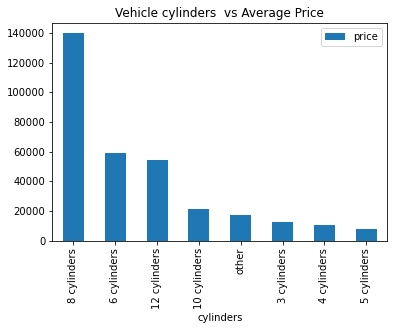

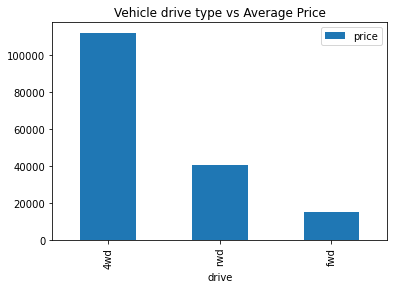

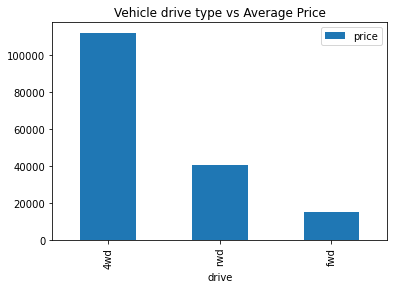

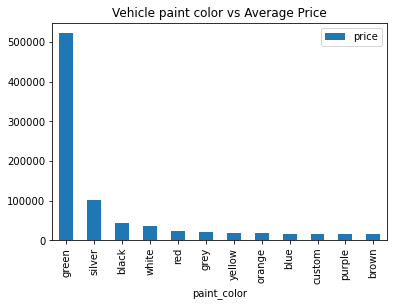

<AxesSubplot:title={'center':'User car paint_color Histogram'}, xlabel='paint_color', ylabel='count'>

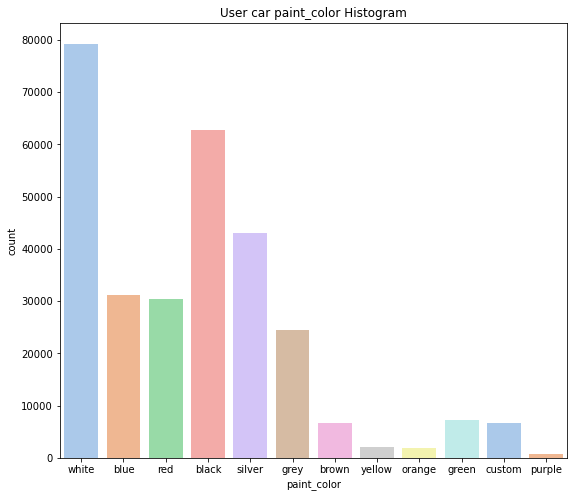

In [16]:
# Visulization of not so important feartures
df = pd.DataFrame(data.groupby(['cylinders'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Vehicle cylinders  vs Average Price')
plt.show()
df = pd.DataFrame(data.groupby(['drive'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Vehicle drive type vs Average Price')
plt.show()
df = pd.DataFrame(data.groupby(['drive'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Vehicle drive type vs Average Price')
plt.show()
df = pd.DataFrame(data.groupby(['paint_color'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Vehicle paint color vs Average Price')
plt.show()
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('User car paint_color Histogram')
sns.countplot(data['paint_color'], palette=("pastel"))


Inference:
* 8 cylinders vehicles fetch higger average price
* 4wd drive vehicles fetch higger average price
* Green color vehicles followed by silver fetch higger average price, however white color followed by black and silver are most sold vehicles. 

In [17]:
# Describe and explore data
print('drive',data['drive'].unique())
print('type',data['type'].unique())
print('paint_color',data['paint_color'].unique())
print('transmission',data['transmission'].unique())
print('title_status',data['title_status'].unique())
print('fuel',data['fuel'].unique())
print('condition',data['condition'].unique())
print('cylinders',data['cylinders'].unique())



drive [nan 'rwd' '4wd' 'fwd']
type [nan 'pickup' 'truck' 'other' 'coupe' 'SUV' 'hatchback' 'mini-van' 'sedan'
 'offroad' 'bus' 'van' 'convertible' 'wagon']
paint_color [nan 'white' 'blue' 'red' 'black' 'silver' 'grey' 'brown' 'yellow'
 'orange' 'green' 'custom' 'purple']
transmission [nan 'other' 'automatic' 'manual']
title_status [nan 'clean' 'rebuilt' 'lien' 'salvage' 'missing' 'parts only']
fuel [nan 'gas' 'other' 'diesel' 'hybrid' 'electric']
condition [nan 'good' 'excellent' 'fair' 'like new' 'new' 'salvage']
cylinders [nan '8 cylinders' '6 cylinders' '4 cylinders' '5 cylinders' 'other'
 '3 cylinders' '10 cylinders' '12 cylinders']


In [18]:
#Describe and Explore data
print('manufacturer',data['manufacturer'].unique())
print('size',data['size'].unique())
print('region',data['region'].unique())
print('state',data['state'].unique())
print('model',data['model'].unique())

manufacturer [nan 'gmc' 'chevrolet' 'toyota' 'ford' 'jeep' 'nissan' 'ram' 'mazda'
 'cadillac' 'honda' 'dodge' 'lexus' 'jaguar' 'buick' 'chrysler' 'volvo'
 'audi' 'infiniti' 'lincoln' 'alfa-romeo' 'subaru' 'acura' 'hyundai'
 'mercedes-benz' 'bmw' 'mitsubishi' 'volkswagen' 'porsche' 'kia' 'rover'
 'ferrari' 'mini' 'pontiac' 'fiat' 'tesla' 'saturn' 'mercury'
 'harley-davidson' 'datsun' 'aston-martin' 'land rover' 'morgan']
size [nan 'full-size' 'mid-size' 'compact' 'sub-compact']
region ['prescott' 'fayetteville' 'florida keys' 'worcester / central MA'
 'greensboro' 'hudson valley' 'medford-ashland' 'erie' 'el paso'
 'bellingham' 'skagit / island / SJI' 'la crosse' 'auburn' 'birmingham'
 'dothan' 'florence / muscle shoals' 'gadsden-anniston'
 'huntsville / decatur' 'mobile' 'montgomery' 'tuscaloosa'
 'anchorage / mat-su' 'fairbanks' 'kenai peninsula' 'southeast alaska'
 'flagstaff / sedona' 'mohave county' 'phoenix' 'show low' 'sierra vista'
 'tucson' 'yuma' 'fort smith' 'jonesboro' 'litt

### Data Preparation

After my initial exploration and fine tuning of the business understanding, it is time to construct my final dataset prior to modeling with 'sklearn'.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

##### Select Data
Rationale for Inclusion/Exclusion:
* VIN number column has 161042 null value, also it dosen't add any value in determining the price of the use car hence this column should removed
* I wanted to drop ID column and make price column as index however I found price column has dubplicates, decided to drop ID column as its not adding value to the solution of finding used car price
* Performing dropna on the entire dataset drops 392012 records hence I decided not to use it on the entire dataset.
##### Clean Data
Data Cleaning Report:
* Column id and VIN were dropped. Object column were converted to Int64 after visual analysis of the categorial column data
##### Construct Data
Derived Attributes:No new attribute were generated using the given dataset column however object value were convert to numeric equivalent category
Generated Records:NA
##### Integrate Data
Merged Data: Merging is not needed for this assignment, there can be possibility of using it but I didn't have time to explore it.
##### Format Data
Reformatted Data: I used the LabelEncoder from sklearn.preprocessing to trasform Object columns to float and later converted float columns to Int64 using Pandas
##### Dataset
Dataset Description: The below columns were selected after data analysis and visulization
|columns selected|
|-------|
|price|
|year|
|manufacturer|
|condition|
|cylinders|
|fuel|
|odometer|
|title_status|
|transmission|
|drive|
|size|
|type|
|paint_color|
|state|
|region|

In [19]:
#Explore data
data.duplicated(subset=['price']).any() 

True

In [20]:
# Explore data: find out what happens if all nulls in the dataset are dropped
drop_data=pd.read_csv('../dataset/vehicles.csv')
drop_data=drop_data.dropna(how='any')
drop_data.shape
print('count of record that will be drop', 426880-34868)

count of record that will be drop 392012


In [21]:
# Data cleaning and selection
data = pd.read_csv('../dataset/vehicles.csv')
data_new=data.copy()
data_new.drop(columns = ['id', 'VIN'], inplace = True)
data_new= data_new.dropna()
data_new.reset_index()
data_new.shape

(79195, 16)

In [22]:
# Construct format and trasform data
le = LabelEncoder()


 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(data_new['transmission'])
data_new.drop("transmission", axis=1, inplace=True)
data_new["transmission"] = label


label = le.fit_transform(data_new['drive'])
data_new.drop("drive", axis=1, inplace=True)
data_new["drive"] = label

label = le.fit_transform(data_new['title_status'])
data_new.drop("title_status", axis=1, inplace=True)
data_new["title_status"] = label

label = le.fit_transform(data_new['fuel'])
data_new.drop("fuel", axis=1, inplace=True)
data_new["fuel"] = label

label = le.fit_transform(data_new['condition'])
data_new.drop("condition", axis=1, inplace=True)
data_new["condition"] = label

label = le.fit_transform(data_new['cylinders'])
data_new.drop("cylinders", axis=1, inplace=True)
data_new["cylinders"] = label

label = le.fit_transform(data_new['size'])
data_new.drop("size", axis=1, inplace=True)
data_new["size"] = label

label = le.fit_transform(data_new['type'])
data_new.drop("type", axis=1, inplace=True)
data_new["type"] = label

label = le.fit_transform(data_new['state'])
data_new.drop("state", axis=1, inplace=True)
data_new["state"] = label

label = le.fit_transform(data_new['model'])
data_new.drop("model", axis=1, inplace=True)
data_new["model"] = label

label = le.fit_transform(data_new['manufacturer'])
data_new.drop("manufacturer", axis=1, inplace=True)
data_new["manufacturer"] = label

label = le.fit_transform(data_new['region'])
data_new.drop("region", axis=1, inplace=True)
data_new["region"] = label

label = le.fit_transform(data_new['paint_color'])
data_new.drop("paint_color", axis=1, inplace=True)
data_new["paint_color"] = label

data_new

,price,year,odometer,transmission,drive,title_status,fuel,condition,cylinders,size,type,state,model,manufacturer,region,paint_color
31,15000,2013.0,128000.0,0,2,0,2,0,5,1,10,1,3868,13,16,0
55,19900,2004.0,88000.0,0,0,0,0,2,6,1,8,1,4232,13,16,1
59,14000,2012.0,95000.0,0,1,0,2,0,5,1,5,1,6336,16,16,9
65,22500,2001.0,144700.0,1,2,0,0,2,6,1,10,1,4364,13,16,10
73,15000,2017.0,90000.0,0,2,4,2,0,6,2,9,1,2241,10,16,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426808,18000,2005.0,130000.0,0,0,1,2,0,6,1,10,50,7716,7,396,1
426809,18000,1990.0,114400.0,0,0,0,2,2,6,1,0,50,4854,20,396,0
426831,9800,1985.0,115000.0,0,2,0,2,3,5,3,4,50,467,30,396,8
426833,6800,1997.0,69550.0,0,2,0,2,2,6,0,2,50,9382,19,396,10


In [23]:
# Construct format  and trasform data
data_new=data_new.convert_dtypes()
data_new = data_new[data_new['price'] != 0]
data_new[data_new.select_dtypes(include=['float']).columns] = data_new.select_dtypes(include=['float']).astype('int64')
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75738 entries, 31 to 426833
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   price         75738 non-null  Int64
 1   year          75738 non-null  Int64
 2   odometer      75738 non-null  Int64
 3   transmission  75738 non-null  Int32
 4   drive         75738 non-null  Int32
 5   title_status  75738 non-null  Int32
 6   fuel          75738 non-null  Int32
 7   condition     75738 non-null  Int32
 8   cylinders     75738 non-null  Int32
 9   size          75738 non-null  Int32
 10  type          75738 non-null  Int32
 11  state         75738 non-null  Int32
 12  model         75738 non-null  Int32
 13  manufacturer  75738 non-null  Int32
 14  region        75738 non-null  Int32
 15  paint_color   75738 non-null  Int32
dtypes: Int32(13), Int64(3)
memory usage: 7.2 MB


In [24]:
data_new.columns

Index(['price', 'year', 'odometer', 'transmission', 'drive', 'title_status',
       'fuel', 'condition', 'cylinders', 'size', 'type', 'state', 'model',
       'manufacturer', 'region', 'paint_color'],
      dtype='object')

In [25]:
#correlation of the data
data_new.corr()

,price,year,odometer,transmission,drive,title_status,fuel,condition,cylinders,size,type,state,model,manufacturer,region,paint_color
price,1.000000,-0.001443,0.000809,-0.001488,-0.002358,-0.001134,-0.003157,-0.002150,0.005387,-0.001507,0.002422,0.001744,0.005257,0.005419,-0.003111,0.004014
year,-0.001443,1.000000,-0.119279,-0.179557,-0.258276,0.061227,-0.019058,-0.037856,-0.201467,0.014169,0.022300,0.012546,0.054425,0.055978,-0.000273,0.033396
odometer,0.000809,-0.119279,1.000000,0.008655,-0.000773,-0.029398,-0.022977,0.012122,0.045504,0.002545,-0.000448,0.000692,-0.004484,0.004597,0.003294,0.001924
transmission,-0.001488,-0.179557,0.008655,1.000000,0.055864,-0.007870,0.002126,-0.010599,-0.087166,-0.080512,-0.004517,-0.037272,-0.025643,0.046960,-0.007039,-0.009370
drive,-0.002358,-0.258276,-0.000773,0.055864,1.000000,-0.006933,0.101877,0.044874,-0.023479,-0.017716,0.178280,-0.054782,-0.125777,-0.077817,0.012378,0.073906
title_status,-0.001134,0.061227,-0.029398,-0.007870,-0.006933,1.000000,0.016047,0.032853,-0.060857,-0.001159,0.002306,0.004786,-0.021500,0.023619,-0.021720,-0.025499
fuel,-0.003157,-0.019058,-0.022977,0.002126,0.101877,0.016047,1.000000,-0.013105,-0.199689,0.064067,-0.186267,-0.018240,0.023226,0.033182,0.009961,-0.070667
condition,-0.002150,-0.037856,0.012122,-0.010599,0.044874,0.032853,-0.013105,1.000000,0.028500,-0.011025,0.027020,0.025730,-0.005486,-0.022890,-0.010145,0.009379
cylinders,0.005387,-0.201467,0.045504,-0.087166,-0.023479,-0.060857,-0.199689,0.028500,1.000000,-0.031689,0.042742,0.018759,0.095838,-0.249565,0.005632,0.031255
size,-0.001507,0.014169,0.002545,-0.080512,-0.017716,-0.001159,0.064067,-0.011025,-0.031689,1.000000,-0.085844,0.021700,0.011667,0.021006,-0.015987,-0.014410


<AxesSubplot:>

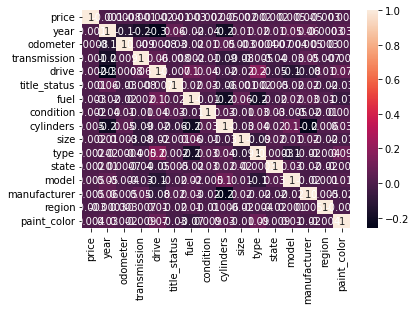

In [26]:
#Visualization of correlation after data conversion
sns.heatmap(data_new.corr(), annot = True, fmt='.1g')

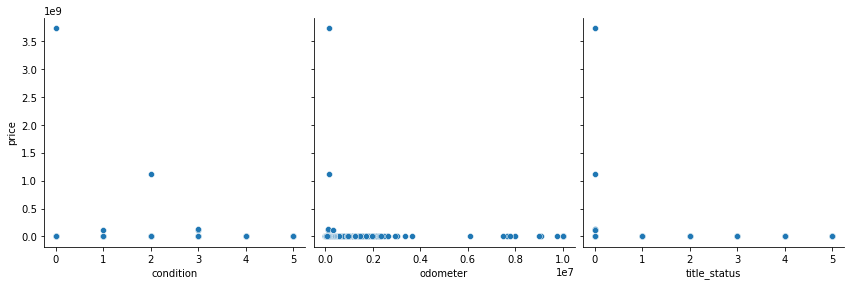

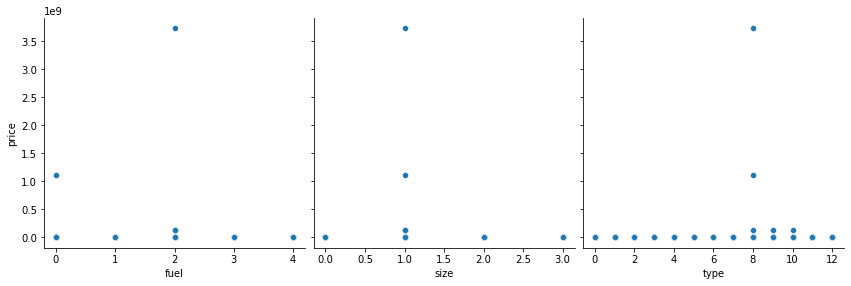

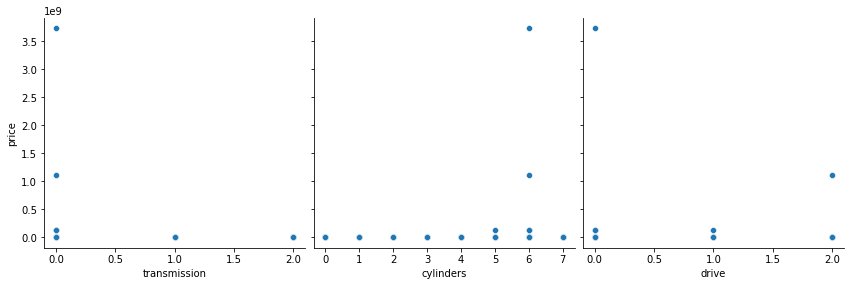

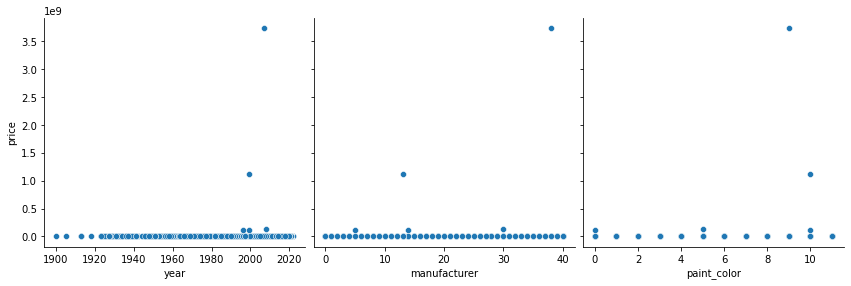

In [27]:
def pairplots_corr(x,y,z):
    sns.pairplot(data_new, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

pairplots_corr('condition', 'odometer', 'title_status')
pairplots_corr('fuel', 'size', 'type')
pairplots_corr('transmission', 'cylinders', 'drive')
pairplots_corr('year', 'manufacturer', 'paint_color')

Inference:
* Vehicle manufacturer, year, cylinder has positive correlation on price
* Odometer, condition , title status, size has negative correlation on price. 
* Please note the categorical columns were converted to numeric hence the numeic value should be mapped to actual unique column value



### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

##### Select Modeling Techniques
Modeling Technique:
* Regression: Liner, Huber, Ridge, Lasso
* Scaler: SequentialFeatureSelector, Standard Scaler
* Estimator: Lasso
* PolynomialFeatures
* GrideSearchCV
* ridge__alpha

Modeling Assumptions:I used the cleaned dataset after dropping column id and VIN, removing nulls and with 79195 records and 16 features
##### Generate Test Design
Test Design: Out of scope of this assignment
##### Build Model
Parameter Settings
Models
Model Descriptions:
* Simple Linear Regresion with all features
* HuberRegressor on all features
* Linear Regression for specific columns using Dummy encoder
* Linear Regression with train and test
* Simple Ridge Regression
* Ridge Regression with PolynomialFeatures, SFS and Lasso as estimator
* Ridge Regression with Standard Scaler and GridSearchCV
##### Assess Model
Model Assessment:
I couldn't use cross_val_score as it took forever to proved me the cross value for each pipeline model.
Revised Parameter Settings: None

Simple Linear Regresion with all features

In [28]:

X = ''
y = ''
all_features_linreg = ''
linreg_mse = ''
data_model=data_new.copy()
X = pd.get_dummies(data_model.drop('price', axis = 1))
y = data_model['price']
all_features_linreg = LinearRegression(fit_intercept=False).fit(X, y)
linreg_mse = mean_squared_error(all_features_linreg.predict(X), y)

print(f'LinearRegression: MSE All features: {linreg_mse}')
print(f'LinearRegression: Coef_ All features: {all_features_linreg.coef_}')


LinearRegression: MSE All features: 201292114600415.5
LinearRegression: Coef_ All features: [-2.20157515e+02  3.62163794e-02 -5.01700574e+04 -2.56610859e+04
 -1.07492431e+04 -3.42128579e+04 -2.68275348e+04  6.47404060e+04
 -2.93658657e+04  8.46961984e+03  1.50842138e+03  2.57208993e+01
  9.08500103e+03 -3.82656700e+02  1.31316244e+04]


HuberRegressor on all features

In [29]:
X = ''
y = ''
huber_all_features = ''
huber_mse = ''
data_model=data_new.copy()
X = pd.get_dummies(data_model.drop('price', axis = 1))
y = data_model['price']
huber_all_features = HuberRegressor(fit_intercept=False).fit(X, y)
huber_mse = mean_squared_error(huber_all_features.predict(X), y)
print(f'HuberRegressor: MSE All features: {huber_mse}')
print(f'HuberRegressor: Coef_ All features: {huber_all_features.coef_}')



HuberRegressor: MSE All features: 201327424437751.97
HuberRegressor: Coef_ All features: [ 7.61736954e+00 -5.29368843e-02 -2.12940600e-05  2.44186033e-03
  9.60412143e-04  5.25232252e-03  3.15807301e-03  2.05501175e-02
  4.26892863e-03  2.93034643e-02  8.72564313e-02  2.49821009e-01
  5.66855403e-02  7.42977070e-01  2.36096879e-02]


Linear Regression for specific columns using Dummy encoder

In [35]:
print('manufacturer',data['manufacturer'].dropna().unique())
data_model=data[['manufacturer','price']].dropna()
data_model.shape
print("shape of data_model = ", data_model.shape)

X = pd.get_dummies(data_model[['manufacturer']])

y = data_model['price']
manufacturer_linreg = LinearRegression(fit_intercept=False).fit(X, y)
manufacturer_mse = mean_squared_error(manufacturer_linreg.predict(X), y)
print(f'manufacturer_mse: MSE for  manufacturer column: {manufacturer_mse}')

gmc_price_prediction = float(round(manufacturer_linreg.coef_[0], 2))
print("gmc_price_prediction = ", gmc_price_prediction)
lexus_price_prediction = float(round(manufacturer_linreg.coef_[11], 2))
print("lexus_price_prediction = ", lexus_price_prediction)

porsche_price_prediction = float(round(manufacturer_linreg.coef_[26], 2))
print("porsche_price_prediction = ", porsche_price_prediction)


manufacturer ['gmc' 'chevrolet' 'toyota' 'ford' 'jeep' 'nissan' 'ram' 'mazda'
 'cadillac' 'honda' 'dodge' 'lexus' 'jaguar' 'buick' 'chrysler' 'volvo'
 'audi' 'infiniti' 'lincoln' 'alfa-romeo' 'subaru' 'acura' 'hyundai'
 'mercedes-benz' 'bmw' 'mitsubishi' 'volkswagen' 'porsche' 'kia' 'rover'
 'ferrari' 'mini' 'pontiac' 'fiat' 'tesla' 'saturn' 'mercury'
 'harley-davidson' 'datsun' 'aston-martin' 'land rover' 'morgan']
shape of data_model =  (409234, 2)
manufacturer_mse: MSE for  manufacturer column: 154720920904741.9
gmc_price_prediction =  19842.87
lexus_price_prediction =  107438.74
porsche_price_prediction =  531710.56


Linear Regression with train and test

shape of X =  (75738, 15)
shape of y =  (75738,)
shape of X_train =  (45442, 15)
shape of y_train =  (45442,)
shape of X_test =  (30296, 15)
shape of y_test =  (30296,)
Liner Regression: MSE All features: 335119860794646.9
Liner Regression: MSE All features: 594443251286.0941
Coefficients:  [-4.45976657e+03  4.37734944e-02 -1.05323846e+05 -5.16832760e+04
 -1.49299657e+04 -5.45792259e+04 -4.60936621e+04  9.75343116e+04
 -4.78612293e+04  1.44084765e+04  2.39603988e+03  4.19396658e+01
  1.51378986e+04 -6.60820499e+02  2.31739353e+04]
Variance score: -0.181517811059563
all_feature_liner_train_mse: MSE for  all feature Linear reg with train test is: 335119860794646.9
all_feature_liner_test_mse: MSE for  all feature Linear reg with test test is: 594443251286.0941


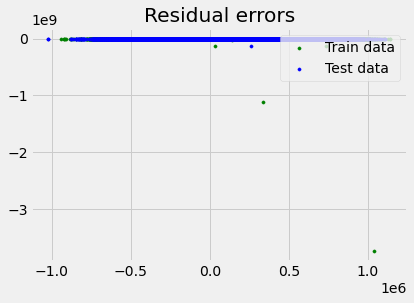

In [ ]:
from sklearn import datasets, linear_model, metrics
data_model=data_new.copy()
# defining feature matrix(X) and response vector(y)
X = data_model.drop(['price'], axis=1)
y = data_model['price']
print("shape of X = ", X.shape)
print("shape of y = ", y.shape)
np.random.seed(0)
# splitting X and y into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 32, train_size = 0.7,test_size=0.3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
print("shape of X_train = ", X_train.shape)
print("shape of y_train = ", y_train.shape)
print("shape of X_test = ", X_test.shape)
print("shape of y_test = ", y_test.shape)
# create linear regression object
all_feature_liner_model = linear_model.LinearRegression()
# train the model using the training sets
all_feature_liner_model.fit(X_train, y_train)
all_feature_liner_train_mse = mean_squared_error(y_train,all_feature_liner_model.predict(X_train))
all_feature_liner_test_mse = mean_squared_error(y_test,all_feature_liner_model.predict(X_test))


all_feature_liner_model_coefs = all_feature_liner_model.coef_
print(f'Liner Regression: MSE All features: {all_feature_liner_train_mse}')
print(f'Liner Regression: MSE All features: {all_feature_liner_test_mse}')


# regression coefficients
print('Coefficients: ', all_feature_liner_model_coefs)
  
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(all_feature_liner_model.score(X_test, y_test)))
print(f'all_feature_liner_train_mse: MSE for  all feature Linear reg with train test is: {all_feature_liner_train_mse}')
print(f'all_feature_liner_test_mse: MSE for  all feature Linear reg with test test is: {all_feature_liner_test_mse}')

#print("cross_val_score=",cross_val_score(all_feature_liner_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error').mean())
# plot for residual error
  
## setting plot style
plt.style.use('fivethirtyeight')
  
## plotting residual errors in training data
plt.scatter(all_feature_liner_model.predict(X_train), all_feature_liner_model.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
## plotting residual errors in test data
plt.scatter(all_feature_liner_model.predict(X_test), all_feature_liner_model.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
  
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
  
## plotting legend
plt.legend(loc = 'upper right')
  
## plot title
plt.title("Residual errors")
  
## method call for showing the plot
plt.show()

Simple Ridge Regression 

In [ ]:
X = ''
y = ''

data_model=data_new.copy()
X = pd.get_dummies(data_model.drop('price', axis = 1))
y = data_model['price']

# Simple Ridge Regression
ridgemodel = Ridge().fit(X_train, y_train)
train_mse = mean_squared_error(y_train, ridgemodel.predict(X_train))
test_mse = mean_squared_error(y_test, ridgemodel.predict(X_test))
ridgemodel_coefs = ridgemodel.coef_
print(f'Ridge Regression: MSE All features: {train_mse}')
print(f'Ridge Regression: MSE All features: {test_mse}')
print(f'Ridge Regression: Coef_ All features: {ridgemodel_coefs}')
#print("cross_val_score=",cross_val_score(ridgemodel, X_train, y_train, cv=5, scoring='neg_mean_absolute_error').mean())

Ridge Regression: MSE All features: 335119860794708.9
Ridge Regression: MSE All features: 594441928437.9065
Ridge Regression: Coef_ All features: [-4.45960627e+03  4.37743221e-02 -1.05301958e+05 -5.16816420e+04
 -1.49297353e+04 -5.45753629e+04 -4.60928702e+04  9.75340335e+04
 -4.78581470e+04  1.44085344e+04  2.39606054e+03  4.19397667e+01
  1.51378518e+04 -6.60820011e+02  2.31739162e+04]


Ridge Regression with PolynomialFeatures, SFS and Lasso as estimator

In [42]:
# Ridge Regression with  PolynomialFeatures and SFS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)
sequential_pipe = Pipeline([('poly_features', PolynomialFeatures(degree = 3, include_bias = False)),
                           ('selector', SequentialFeatureSelector(estimator = Lasso(),
                                                             n_features_to_select=4)),
                           ('ridge', Ridge())])
sequential_pipe.fit(X_train, y_train)
sequential_train_mse = mean_squared_error(y_train, sequential_pipe.predict(X_train))
sequential_test_mse = mean_squared_error(y_test, sequential_pipe.predict(X_test))

print(f'Ridge Regression with SFS Train MSE: {sequential_train_mse}')
print(f'Ridge Regression with SFS Test MSE: {sequential_test_mse}')
#print("cross_val_score=",cross_val_score(sequential_pipe, X_train, y_train, cv=5, scoring='neg_mean_absolute_error').mean())
sequential_pipe


Ridge Regression with Standard Scaler and GridSearchCV

In [ ]:
# Ridge Regression with standard Scaler and GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

ridge_param_dict = {'ridge__alpha': np.logspace(0.1, 1, 50, 100)}
ridge_pipe = Pipeline([('scaler', StandardScaler()), 
                      ('ridge', Ridge())])
ridge_grid = GridSearchCV(ridge_pipe, param_grid=ridge_param_dict,scoring = 'neg_root_mean_squared_error')
ridge_grid.fit(X_train, y_train)
ridge_train_preds = ridge_grid.predict(X_train)
ridge_test_preds = ridge_grid.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_train_preds)
ridge_test_mse = mean_squared_error(y_test, ridge_test_preds)

print(f'Ridge Regression with StandardScaler Train MSE: {ridge_train_mse}')
print(f'Ridge Regression with StandardScaler Test MSE: {ridge_test_mse}')
#print("cross_val_score=",cross_val_score(ridge_pipe, X_train, y_train, cv=5, scoring='neg_mean_absolute_error').mean())
ridge_pipe

Ridge Regression with StandardScaler Train MSE: 251605335199579.84
Ridge Regression with StandardScaler Test MSE: 53906166159.14756


Pipeline(steps=[('scaler', StandardScaler()), ('ridge', Ridge())])

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

##### Evaluate Results

Assessment of Data: More records would provide better result

Mining Results w.r.t.: Observation seen during data understanding phase matached with that in modeling phase

Business Success Criteria:The explored models can predict the price of the used car. 

Approved Models:


##### Review Process
Review of Process: After submission my course instructor will review the assignement
##### Determine Next Steps
List of Possible Actions Decision: With more computational power a larger dataset can be explored. I couldn't use the modal column as it contain some font that threw error. 
The model execution was taking lot of time hope to optimize it futher at a later date.

### Deployment

The practise-assignment-2.ipynb and the ReadMe.md are the deployment artifact along with the visulization fig